# Student Mental Health Analysis Project

**Member lists**

|Full Name|MSSV|Tasks|Contribution 
| :------ | :---: | :--------- | :--------------------------
|Lâm Thị Xuân Thy|20127082||100%
|Đào Ngọc Hoa|20127500||100%

## I. Collecting data
**General: Collecting data on Kaggle**

**Link:** 
> https://www.kaggle.com/datasets/shariful07/student-mental-health?fbclid=IwAR28tzZnwqReWZ4_Y-oKhFrEk6RcayC7GazLiiHXggREmAMefijZVx93O6Q

### What subject is your data about?

*Answer: The subject is Student's Mental Health (A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA )*

### What is the source of your data?

*Answer: A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA dataset
This Data set was collected by a survey conducted by Google forms from University student in order to examine their current academic situation and mental health*

### Do authors of this data allow you to use like this? You can check the data license

*Answer*: 

*- Yes they allow for people to use this data.*

*- Yes, I can check the data license.*


![image info](License.png)

### How did authors collect data?

*Answer: This Data set was collected by a survey conducted by Google forms from University student in order to examine their current academic situation and mental health*

------------

## II. Data Exploration 
(This process is often interleaved with preprocessing)

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from io import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import preprocessing 
from datetime import datetime, date, time, timezone
from sklearn.metrics import accuracy_score


import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

### Read data

In [2]:
data = pd.read_csv('data/Student Mental health.csv')
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


### Initial observation of the distribution of values ​​of attributes in data through visual charts

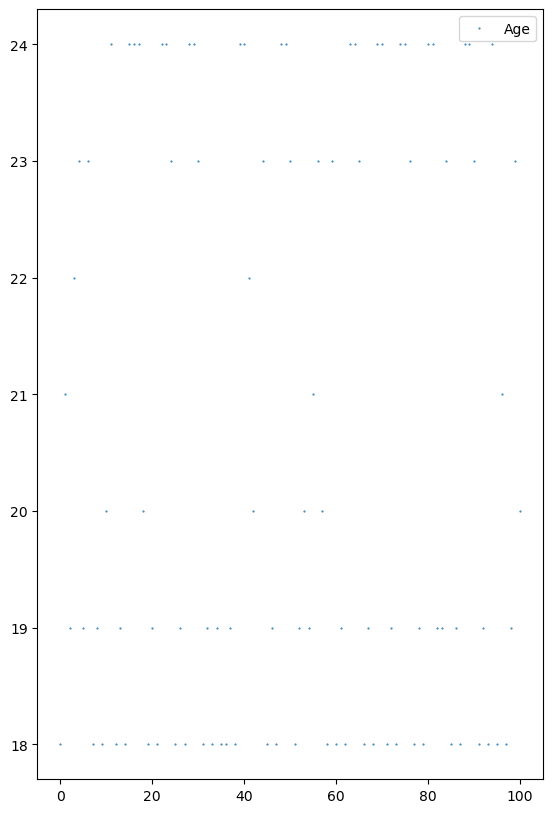

In [3]:
data.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), figsize=(30, 10), markersize=1)
plt.show()

### General observation of the correlation of attributes in the data through the correlation matrix

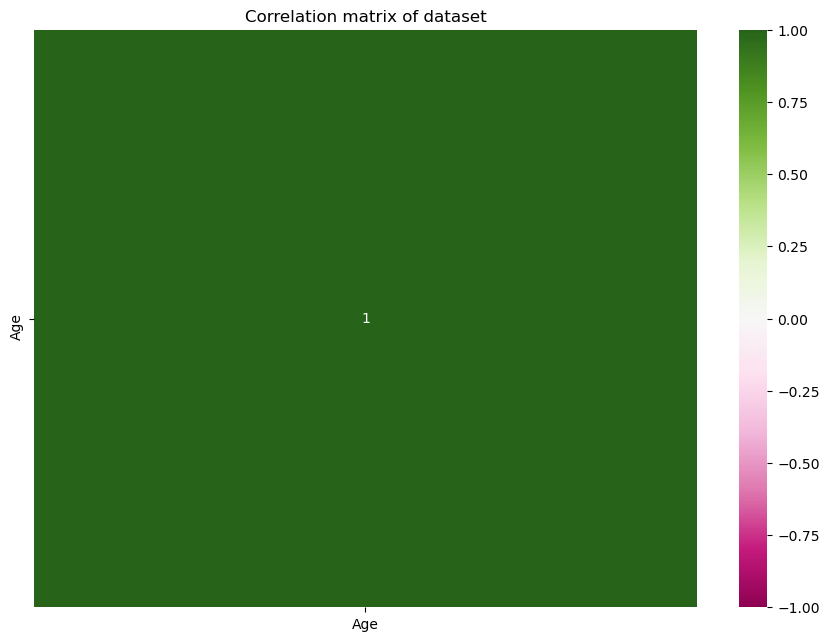

In [4]:
plt.figure(figsize=(10.7,7.5))
track_corr = sns.heatmap(data.corr(),vmin=-1, vmax=1, cmap='PiYG', annot=True)
plt.title('Correlation matrix of dataset')
plt.show()

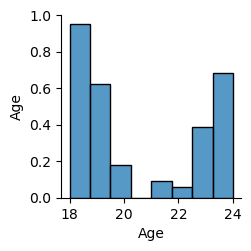

In [5]:
sns.pairplot(data)
plt.show()

In [6]:
data.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


### Specifically observation of the distribution of values ​​of attributes in data through visual charts

#### a. How many rows and how many columns?

In [7]:
rows, cols = data.shape

*The number of rows:*

In [8]:
rows

101

*The number of columns:*

In [9]:
cols

11

#### b. What is the meaning of each row?

*Answer: Each row is a record of a student to find out whether they have any mental problems.*

#### c. Are there duplicated rows?

In [10]:
data.duplicated().sum()

0

*-> no duplicated.*

#### d. What is the meaning of each column?

|Atrribute|Meanings
| :------ | :---:
|Timestamp|Thời gian khởi tạo
|Choose your gender|Giới tính
|Age|Tuổi
|What is your course?|Khóa học tham gia
|Your current year of Study|Năm theo học hiện tại
|What is your CGPA?|Điểm GPA trung bình
|Marital status|Tình trạng hôn nhân
|Do you have Depression| Bạn có stress không? (Yes-No Question)
|Do you have Anxiety?| Bạn có lo lắng không? (Yes-No Question)
|Do you have Panic attack?| Bạn có bị các tác nhân gây hoảng sợ không (Yes-No Question)
|Did you seek any specialist for a treatment?| Bạn có tìm kiếm chuyên gia điều trị không?

#### e. What is the current data type of each column? Are there columns having inappropriate data types?

In [11]:
data.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

*Answer: Timestamp need to be changed to datetime.*

**Convert datatype of `Timestamp` to datatime**

In [12]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

#### f. With each numerical column, how are values distributed?

In [13]:
# YOUR CODE HERE
nume_data = data.describe()
missing_percentage = ((1-nume_data.loc['count']/rows) * 100).round(1)
nume_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                 'min': nume_data.loc['min'],
                                'max': nume_data.loc['max']})
nume_col_info_df = nume_col_info_df.T
nume_col_info_df

,Age
missing_percentage,1.0
min,18.0
max,24.0


*-> Không có gì bất thường*

#### g. With each categorical column, how are values distributed?

##### General observation

In [14]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn
# YOUR CODE HERE
cat_data = data.select_dtypes(include=['object'])
value_percentages = cat_data.apply(lambda x: (x.explode().dropna().value_counts(normalize = True)*100).round(1).to_dict())
missing_percentage = cat_data.apply(lambda x: ((1-x.value_counts().sum()/len(data)) * 100).round(1))
num_values = cat_data.apply(lambda x: len(pd.Series(x.unique()).explode().dropna().unique()))
cate_col_info_df = pd.DataFrame({'missing_percentage':missing_percentage,
                                'num_values':num_values,
                                'value_percentages': value_percentages})
cate_col_info_df = cate_col_info_df.T

cate_col_info_df

,Choose your gender,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
missing_percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,2,49,7,6,2,2,2,2,2
value_percentages,"{'Female': 74.3, 'Male': 25.7}","{'BCS': 17.8, 'Engineering': 16.8, 'BIT': 9.9, 'Biomedical science': 4.0, 'KOE': 4.0, 'BENL': 2....","{'year 1': 40.6, 'Year 3': 18.8, 'Year 2': 15.8, 'year 2': 9.9, 'year 4': 7.9, 'year 3': 5.0, 'Y...","{'3.50 - 4.00': 46.5, '3.00 - 3.49': 42.6, '2.50 - 2.99': 4.0, '0 - 1.99': 4.0, '2.00 - 2.49': 2...","{'No': 84.2, 'Yes': 15.8}","{'No': 65.3, 'Yes': 34.7}","{'No': 66.3, 'Yes': 33.7}","{'No': 67.3, 'Yes': 32.7}","{'No': 94.1, 'Yes': 5.9}"


The mising percentage of all catergorical columns are 0.0%.

##### 1. Gender

This column is reasonable.

In [15]:
num_gender = pd.Series(cate_col_info_df.loc['value_percentages','Choose your gender'])

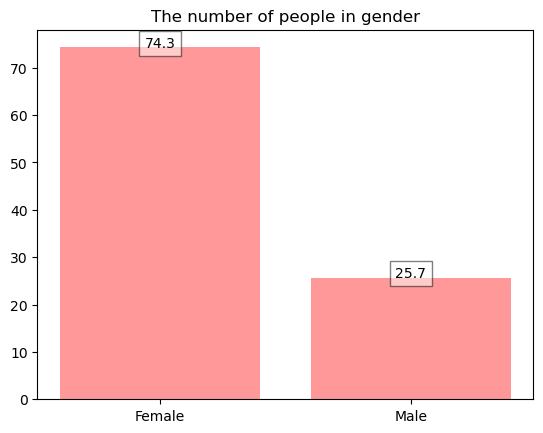

In [16]:
#VISUALIZE
plt.bar(num_gender.index , num_gender.values, alpha = 0.4, color = 'r')
plt.title("The number of people in gender")
for i in range(len(num_gender.index)):
    plt.text(i, num_gender.values[i], num_gender.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 2. Course

In [17]:
data['What is your course?'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

As what we can see, this column is unvalid, since `Psychology` and `psychology` are the same majors; `engin`, `engine` and `engineering` are the same majors; `Fiqh fatwa` and `fiqh` are similar, for example. Therefore, in the following step, I would preprocess this column.

In [18]:
data['What is your course?'] = data['What is your course?'].str.strip()
data['What is your course?'] = data['What is your course?'].str.capitalize()
data['What is your course?'].replace({'Engin': 'Engineering' , 'Engine':'Engineering' ,'Bit':'It','Kirkhs': 'Irkhs', 'Fiqh fatwa': 'Fiqh', 'Laws': 'Law'} , inplace = True)

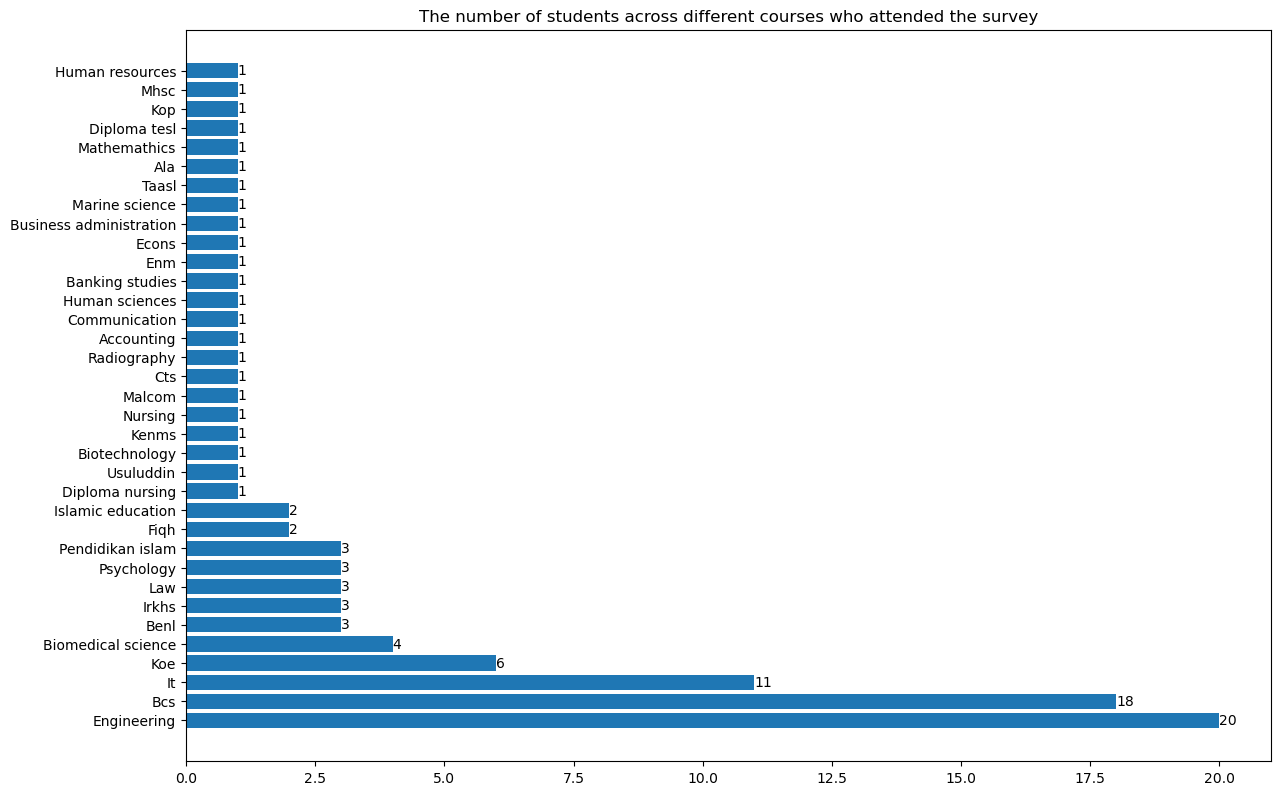

In [19]:
#Visualize the current courses
courses = data['What is your course?'].value_counts()
fig, ax = plt.subplots(figsize=(14,9.5))
bars = ax.barh(courses.index , courses.values)
ax.bar_label(bars)
plt.title('The number of students across different courses who attended the survey')
plt.show()

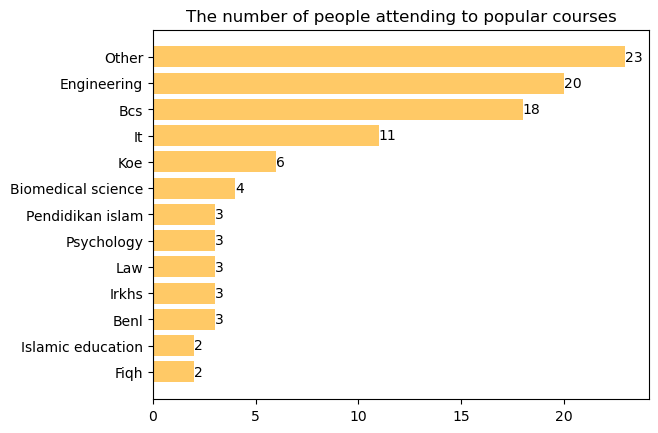

In [20]:
other_courses = courses[courses <=1].sum()
results = pd.DataFrame(courses[courses > 1]).append([{'What is your course?' : other_courses}],ignore_index=False)

index_labels= list(results.index)
index_labels.pop()
index_labels.append('Other')

results.index = index_labels
results = results['What is your course?']
results = results.sort_values(ascending = True)

fig, ax = plt.subplots()
bars = ax.barh(results.index, results.values, color = 'orange', alpha = 0.6)

ax.bar_label(bars)
plt.title("The number of people attending to popular courses")
plt.show()

##### 3. Year of study

In [21]:
data['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

As we can see, `year 1` and `Year 1` are not different, for instance, so I would preprocess it.

In [22]:
data['Your current year of Study'] = [i[len(i) - 1] for i in data['Your current year of Study']]
num_years = data['Your current year of Study'].value_counts()
num_years = num_years.sort_index()

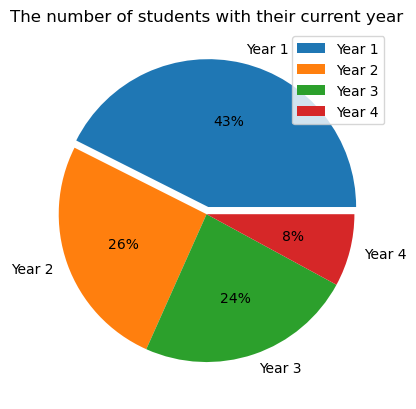

In [23]:
#visualize
myexplode = [0.05, 0, 0, 0]
total = sum(num_years)
plt.pie(num_years, labels = 'Year ' + num_years.index, explode = myexplode, autopct=lambda p: '{:.0f}%'.format(p * total / 100))
plt.title("The number of students with their current year")
plt.legend()
plt.show()

##### 4. What is your CGPA?

In [24]:
data['What is your CGPA?'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

As we can see, `3.50 - 4.00` and `3.50 - 4.00` are similar, so we would fix it.

In [25]:
data['What is your CGPA?'] = data['What is your CGPA?'].str.strip()
num_CGPA = data['What is your CGPA?'].value_counts()
num_CGPA = num_CGPA.sort_index()
num_CGPA

0 - 1.99        4
2.00 - 2.49     2
2.50 - 2.99     4
3.00 - 3.49    43
3.50 - 4.00    48
Name: What is your CGPA?, dtype: int64

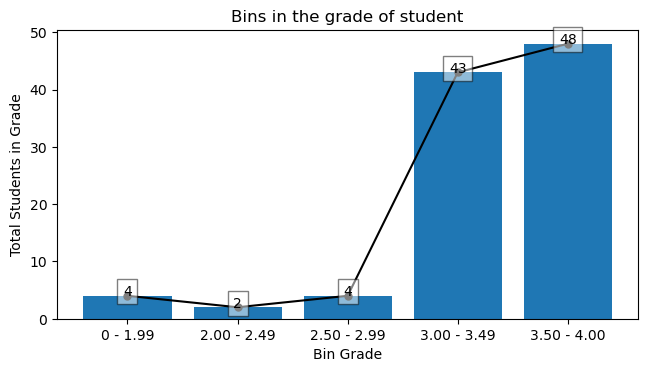

In [26]:
plt.figure(figsize=(7.5,3.75))
plt.bar(num_CGPA.index , num_CGPA.values)
plt.xlabel("Bin Grade")
plt.ylabel("Total Students in Grade")
plt.title("Bins in the grade of student")
for i in range(len(num_CGPA.index)):
    plt.text(i, num_CGPA.values[i], num_CGPA.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
    
plt.plot(num_CGPA.values, marker='.', color='black', ms=10)
plt.show()

Qua biểu đồ trên, ta có thể thấy những người điền phiếu khảo sát đa phần có học lực khá giỏi, với GPA từ `3.0` trở lên

##### 5. Marital status

In [27]:
marital_status = data[['Marital status', 'Choose your gender']]
results_status = marital_status.groupby(['Marital status','Choose your gender']).size()

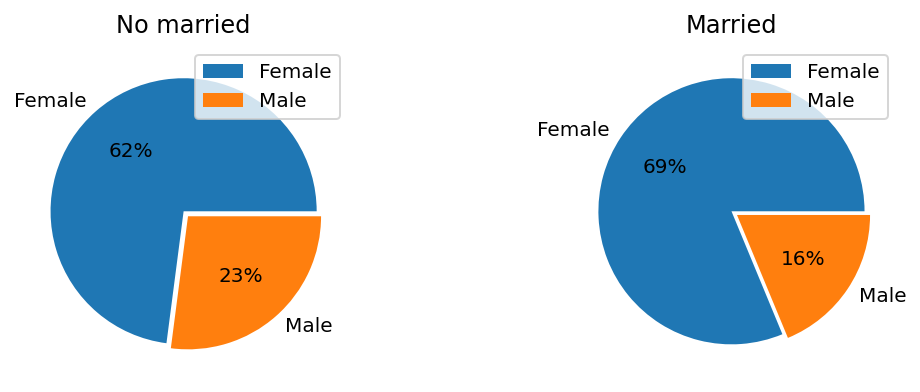

In [28]:
# the same figure for both subplots
fig = plt.figure(figsize=(9,3),dpi=144)

explode = (0, 0.05)
total = sum(results_status['No'])
ax1 = fig.add_subplot(121)
ax1.pie(results_status['No'], labels = results_status['No'].index, 
        autopct=lambda p: '{:.0f}%'.format(p * total / 100), explode=explode)
ax1.set_title('No married')
ax1.legend()


total = sum(results_status['No'])
ax2 = fig.add_subplot(122)
ax2.set_title('Married')
ax2.pie(results_status['Yes'], labels = results_status['Yes'].index, 
        autopct=lambda p: '{:.0f}%'.format(p * total / 100), explode=explode)
ax2.legend()
plt.show()

##### 6. Do you have Depression?

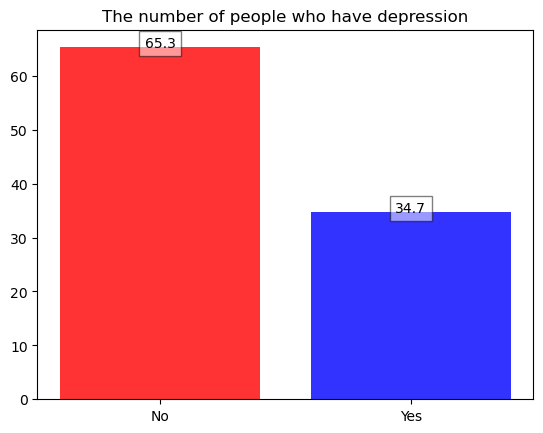

In [29]:
num_depression = pd.Series(cate_col_info_df.loc['value_percentages','Do you have Depression?'])
plt.bar(num_depression.index , num_depression.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("The number of people who have depression")
for i in range(len(num_depression.index)):
    plt.text(i, num_depression.values[i], num_depression.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 7. Do you have Anxiety?

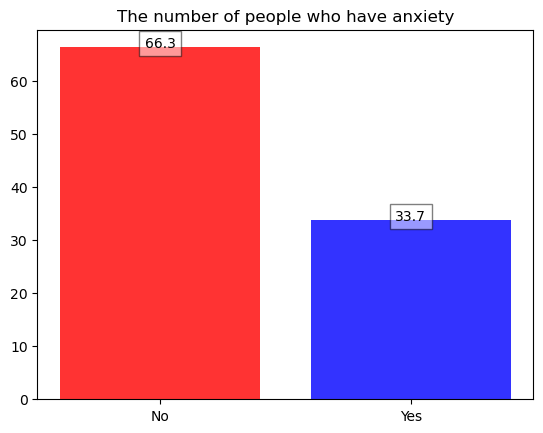

In [30]:
num_anxiety = pd.Series(cate_col_info_df.loc['value_percentages','Do you have Anxiety?'])
plt.bar(num_anxiety.index , num_anxiety.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("The number of people who have anxiety")
for i in range(len(num_anxiety.index)):
    plt.text(i, num_anxiety.values[i], num_anxiety.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 8. Do you have Panic attack?

In [31]:
num_panic = pd.Series(cate_col_info_df.loc['value_percentages','Do you have Panic attack?'])

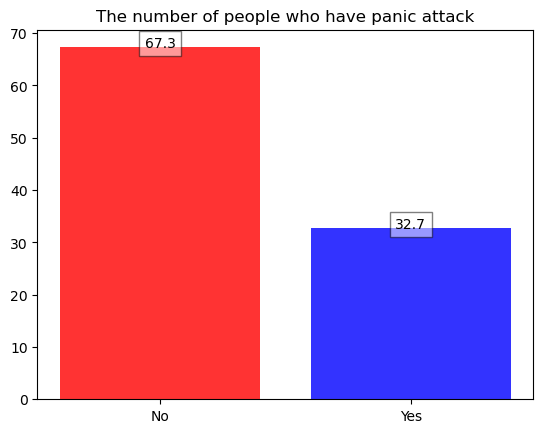

In [32]:
plt.bar(num_panic.index , num_panic.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("The number of people who have panic attack")


for i in range(len(num_panic.index)):
    plt.text(i, num_panic.values[i], num_panic.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

##### 10. Did you seek any specialist for a treatment?

In [33]:
num_spe = pd.Series(cate_col_info_df.loc['value_percentages','Did you seek any specialist for a treatment?'])

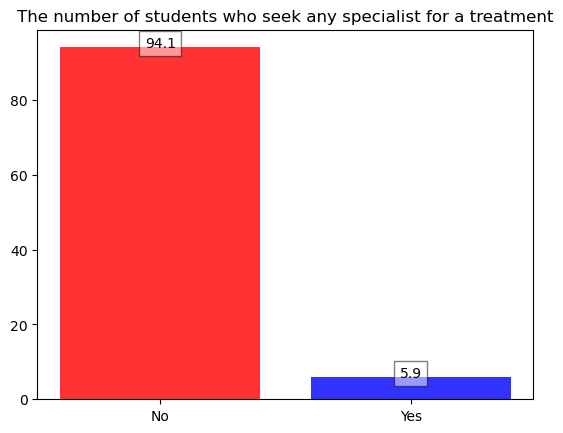

In [34]:
plt.bar(num_spe.index , num_spe.values, alpha = 0.8, color = ['red', 'blue'])
plt.title("The number of students who seek any specialist for a treatment")
for i in range(len(num_spe.index)):
    plt.text(i, num_spe.values[i], num_spe.values[i], ha = 'center', bbox = dict(facecolor = 'white', alpha = .5))
plt.show()

#### One-hot encoding yes-no questions

In [35]:
for cols in data.columns[6:]:
    data[cols] = LabelEncoder().fit_transform(data[cols])
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,2020-08-07 12:02:00,Female,18.0,Engineering,1,3.00 - 3.49,0,1,0,1,0
1,2020-08-07 12:04:00,Male,21.0,Islamic education,2,3.00 - 3.49,0,0,1,0,0
2,2020-08-07 12:05:00,Male,19.0,It,1,3.00 - 3.49,0,1,1,1,0
3,2020-08-07 12:06:00,Female,22.0,Law,3,3.00 - 3.49,1,1,0,0,0
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,4,3.00 - 3.49,0,0,0,0,0


#### General observation of the distribution of values of attributes in data through visual charts after modifying data types.

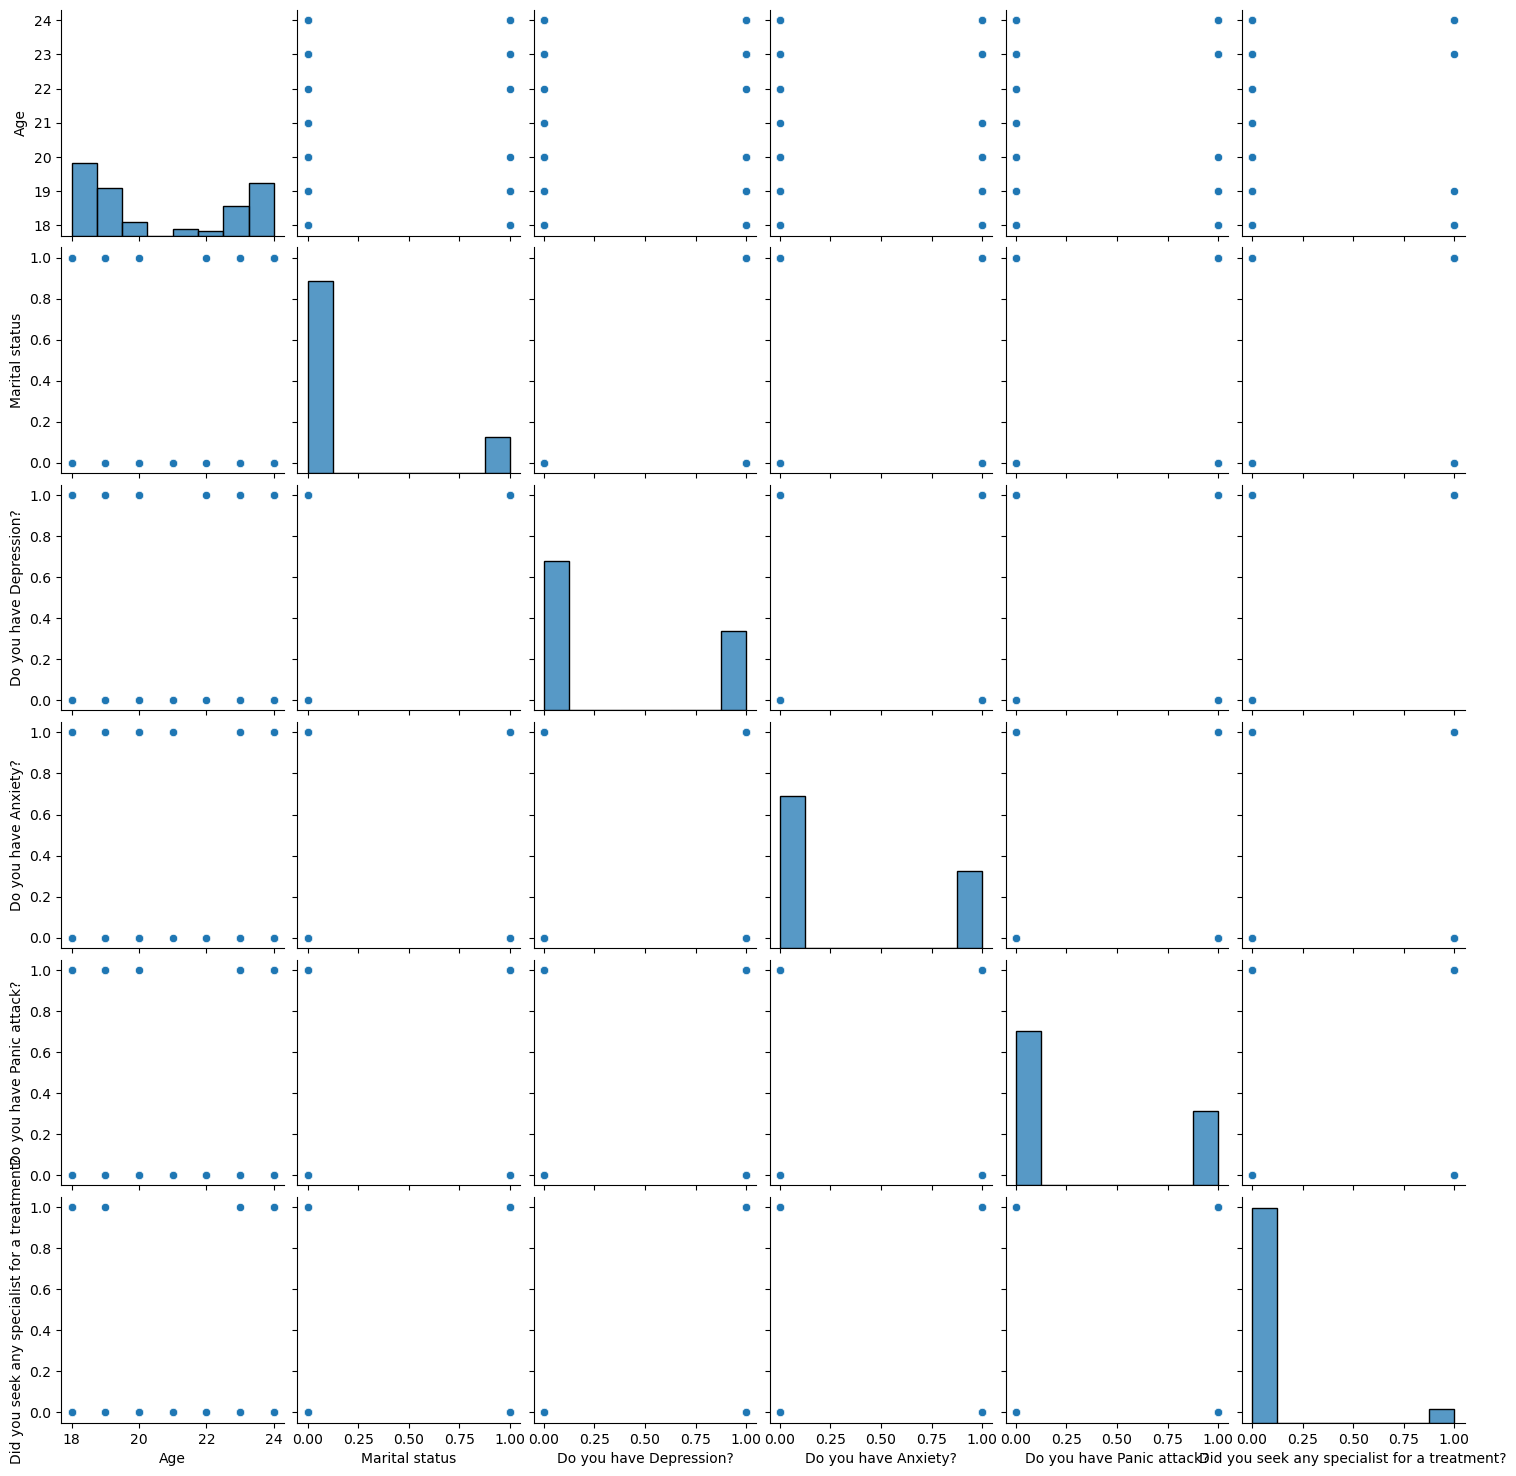

In [36]:
sns.pairplot(data)
plt.show()

#### General observation of the correlation of attributes in the data through the correlation matrix after modifying data types.

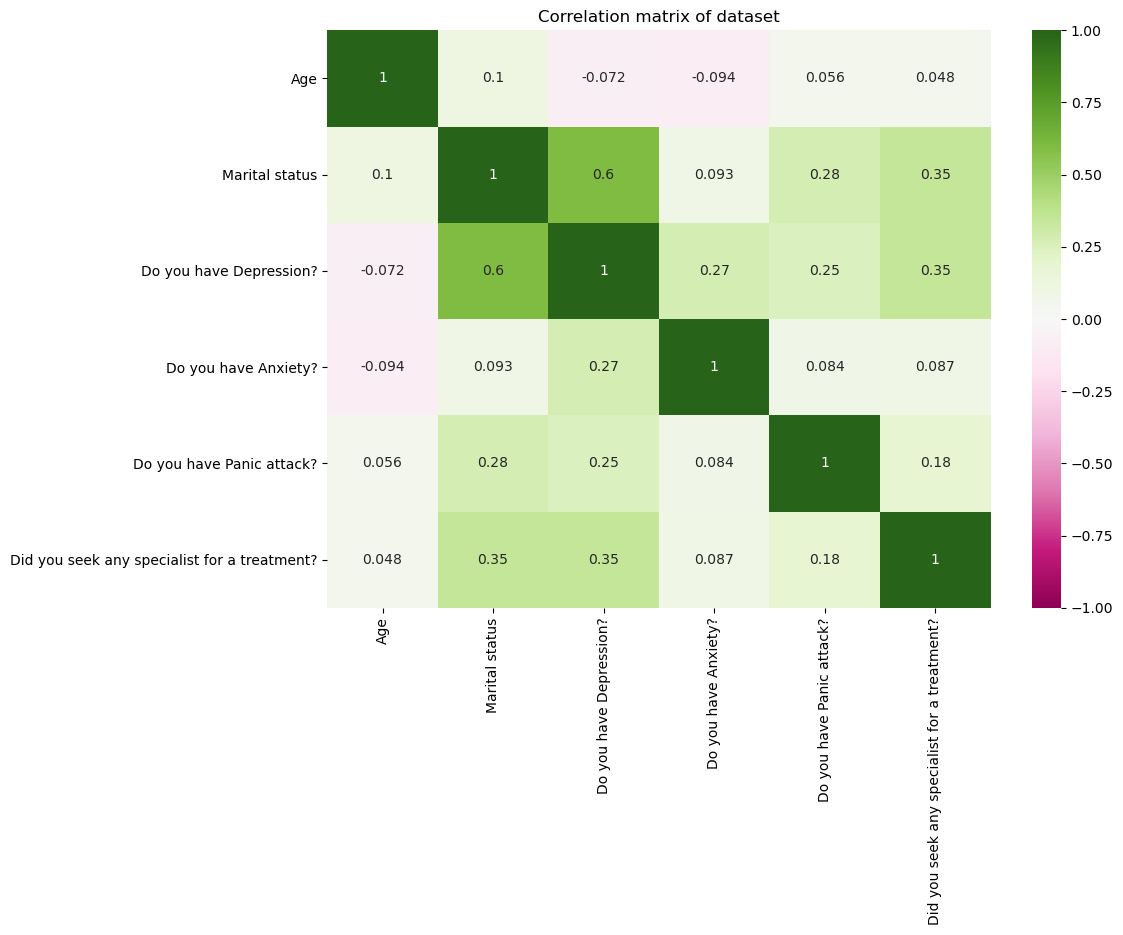

In [37]:
plt.figure(figsize=(10.7,7.5))
track_corr = sns.heatmap(data.corr(),vmin=-1, vmax=1, cmap='PiYG', annot=True)
plt.title('Correlation matrix of dataset')
plt.show()

---------------

# III. Asking meaningful questions

### Question 1. Liệu sinh viên có cần đến các chuyên gia để điều trị tâm lý hay không?
**Ngữ cảnh:**  Để cải thiện sức khỏe tinh thần trong sinh viên, nhà trường đã mời một số chuyên gia tâm lí để giải đáp các thắc mắc, đưa ra các tư vấn tâm lí hữu ích cho sinh viên, từ đó nâng cao kết quả học tập và chất lượng dạy và học. Tuy nhiên, không phải sinh viên nào cũng có vấn đề sức khỏe về tâm lý, vấn đề này phụ thuộc vào nhiều yếu tố như ngành học, điểm số, tình trạng hôn nhân, ... Vì thế, bài toán đặt ra là làm thế nào để có thể giúp nhà trường có thể tìm ra các sinh viên có vấn đề về sức khỏe tinh thần.

**Giải pháp**: Một trong những giải pháp ta có thể xem xét đến là dựa vào tình trạng sức khỏe, cảm nhận của học viên về tình trạng stress, lo lắng của chính mình, từ đó xây dựng mô hình học máy để dự đoán liệu học viên đó có cần đi tư vấn tâm lí hay không.

**Ứng dụng:** Trả lời được câu hỏi để tìm ra được danh sách các sinh viên có bất ổn tâm lí, ta có thể thu hẹp danh sách sinh viên xuống đáng kể, trong khi trong 1 trường có thể có cả ngàn sinh viên. Từ đó, nâng cao chất lượng của buổi tư vấn tâm lý khi các chuyên gia biết rằng các học viên khi đến buổi tư vấn đều có một vấn đề gì đó trong cuộc sống khiến họ áp lực. Nhờ vậy, họ sẽ có các cách gợi mở tốt hơn dành cho học viên để họ có thể gỡ đi khuất mắc của chính mình, để họ hiểu được chính mình và vượt qua được áp lực trong học tập và cuộc sống.


**Về bộ dữ liệu để trả lời câu hỏi:** Câu hỏi này có thể trả lời sử dụng dữ liệu **data** phía trên với các thuộc tính cần quan tâm `Do you have Depression?`, `Do you have Anxiety?`, `Do you have Panic attack?`

**Danh sách tóm tắt các bước phân tích:**

| Step        | Output |
| ----------- | ----------- |
| Lọc ra các thuộc tính cần quan tâm từ data | Dữ liệu track đã được merge thêm trường id và username từ user |
| Từ dữ liệu đã được lọc, tìm ra và  đưa dữ liệu vào mô hình phân lớp decision tree|Kết quả có hay không việc sinh viên cần đi tư vấn tâm lí|

In [38]:
data_handle = data[['Choose your gender', 'Age', 'Your current year of Study', 
                   'Marital status', 'Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 
                   'Did you seek any specialist for a treatment?']]

#### *Áp dụng phân lớp bằng Decision Tree*

In [39]:
feature_cols = ['Do you have Depression?','Do you have Anxiety?','Do you have Panic attack?']

In [40]:
X = data[feature_cols] # Features
y = data['Did you seek any specialist for a treatment?'] # Target variable

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [42]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=4, max_features = "auto", splitter = 'random')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

results = clf.predict(X_train)
train_acc = accuracy_score(y_train, results)*100


y_pred = clf.predict(X_test)
val_acc = accuracy_score(y_pred, y_test)*100  



print(f"Train accuracy: {train_acc}")
print(f"Validation accuracy: {val_acc}")

Train accuracy: 97.14285714285714
Validation accuracy: 87.09677419354838


In [43]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['No','Yes'])
graph = pydotplus.graphviz.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

InvocationException: Program terminated with status: 1. stderr follows: Warning: Could not load "/home/ngochoa/miniconda3/envs/min_ds-env/bin/../lib/graphviz/libgvplugin_pango.so.6" - It was found, so perhaps one of its dependents was not.  Try ldd.
Warning: Could not load "/home/ngochoa/miniconda3/envs/min_ds-env/bin/../lib/graphviz/libgvplugin_pango.so.6" - It was found, so perhaps one of its dependents was not.  Try ldd.
Warning: Could not load "/home/ngochoa/miniconda3/envs/min_ds-env/bin/../lib/graphviz/libgvplugin_pango.so.6" - It was found, so perhaps one of its dependents was not.  Try ldd.
Warning: Could not load "/home/ngochoa/miniconda3/envs/min_ds-env/bin/../lib/graphviz/libgvplugin_pango.so.6" - It was found, so perhaps one of its dependents was not.  Try ldd.
Warning: Could not load "/home/ngochoa/miniconda3/envs/min_ds-env/bin/../lib/graphviz/libgvplugin_gd.so.6" - It was found, so perhaps one of its dependents was not.  Try ldd.
Format: "png" not recognized. Use one of: bmp canon cmap cmapx cmapx_np dot dot_json eps fig gd gd2 gif gv ico imap imap_np ismap jpe jpeg jpg json json0 mp pdf pic plain plain-ext png pov ps ps2 svg svgz tif tiff tk vdx vml vmlz vrml wbmp webp xdot xdot1.2 xdot1.4 xdot_json


-> Cây phân lớp dự đoán khá chính xác vì từ phần visualize ban đầu ta nhìn thấy có rất ít sinh viên sẽ tìm đến phương pháp điều trị 

**Kết luận**: ta có thể sử dụng mô hình trên nhằm giúp nhà trường tìm ra các sinh viên cần được tư vấn để được điều trị bởi bác sĩ.

## Question 2: Sinh viên cần được nhà trường quan tâm các vấn đề về tâm lý ở mức độ như thế nào?

**Ngữ cảnh:** Thấu hiểu cho tình trạng của sinh viên, nhà trường mong muốn đưa ra các giải pháp nhằm giảm thiểu áp lực học tập hiện tại mà sinh viên đang phải chịu đựng. Vì thế, nhà trường đã tạo 1 phiếu khảo sát, các sinh viên quan tâm có thể nêu lên các vấn đề tâm lí cần nhà trường giúp đỡ. Việc tìm ra đối tượng sinh viên phù hợp để nhà trường có các hỗ trợ tâm lý cũng như giảm thiểu áp lực sẽ rất có ý nghĩa, từ đó giúp sinh viên cải thiện sức khỏe tinh thần cũng như học tập.

**Giải pháp**: Một trong những giải pháp ta có thể xem xét đến là dựa vào năm học hiện tại của sinh viên là năm mấy của trường. Sau đó phân tích các số liệu trong khảo sát, từ đó đưa ra các giải pháp để nhà trường có thể giúp đỡ sinh viên. 

**Ứng dụng:** Trả lời được câu hỏi để tìm ra được mức độ cần giúp đỡ của các sinh viên đang theo học tại trường sê giúp nhà trường điều chỉnh sự hỗ trợ hiện tại phù hợp cho sinh viên, cũng như chuẩn bị các chương trình cải thiện sức khỏe tinh thần giúp sinh viên học tập tốt hơn.


**Về bộ dữ liệu để trả lời câu hỏi:** Câu hỏi này có thể trả lời sử dụng dữ liệu **data** ở trên.

**Danh sách tóm tắt các bước phân tích:**

| Step        | Mục đích |
| ----------- | ----------- |
| Vẽ biểu đồ số lượng sinh viên các năm đã thực hiện điền khảo sát | Nhằm có cái nhìn trực quan về số lượng sinh viên khảo sát theo số năm học tại trường |
| Vẽ biểu đồ thể hiện tỉ lệ sinh viên cảm thấy lo lắng theo từng nhóm| Nhằm có cái nhìn trực quan về mức độ lo lắng của sinh viên theo từng nhóm đối tượng |
| Vẽ biểu đồ thể hiện tỉ lệ sinh viên cảm thấy trầm cảm theo từng nhóm| Nhằm có cái nhìn trực quan về mức độ trầm cảm của sinh viên theo từng nhóm đối tượng |
| Vẽ biểu đồ thể hiện tỉ lệ sinh viên đã tìm đến điều trị tâm lí theo từng nhóm| Nhằm có cái nhìn trực quan về tình trạng điều trị tâm lí của sinh viên theo từng nhóm đối tượng |

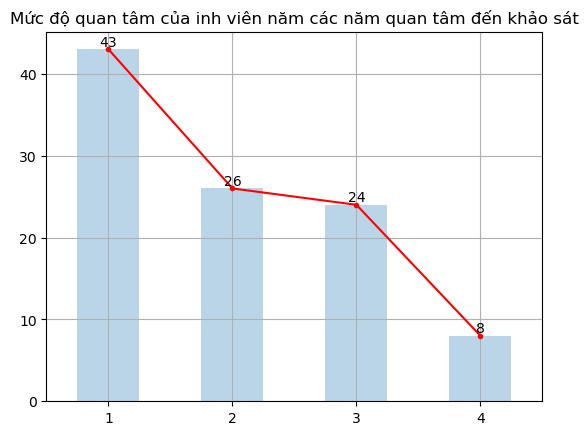

In [44]:
years = data['Your current year of Study'].value_counts()
years = years.sort_index()
years
score_series = pd.Series(years.values)
x_labels = years.index
plt.figure()
fig = score_series.plot(kind='bar', alpha=0.3)
fig.set_xticklabels(x_labels, rotation = 'horizontal')
fig.bar_label(fig.containers[0], label_type='edge')
plt.grid(True)
plt.plot(years.values, marker = ".", color = 'r')
plt.title("Mức độ quan tâm của inh viên năm các năm quan tâm đến khảo sát")
plt.show()

**Nhận xét:** Từ biểu đồ trên, ta có thể thấy rằng sinh viên năm thứ 1,2,3 là những người quan tâm đến khảo sát này, trong khi có khá ít sinh viên năm 4 quan tâm việc điền khảo sát. Ngoài ra, sinh viên năm 1 điền phiếu khảo nhiều nhất, trong khi số lượng sinh viên điền khảo sát ở năm 2 và năm 3 là gần như nhau.

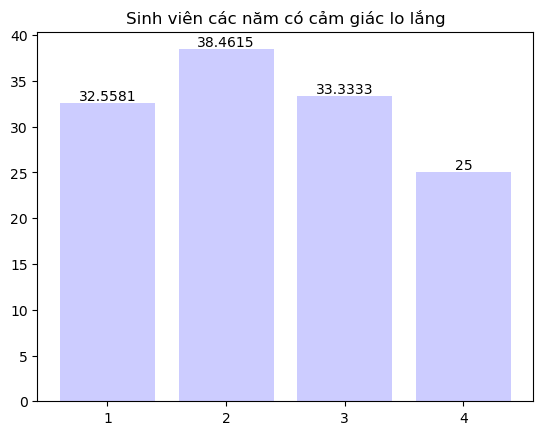

In [45]:
# YOUR CODE HERE
depression_levels_by_courses= pd.DataFrame(data.groupby(['Your current year of Study']
                                              )['Do you have Anxiety?'].value_counts(normalize = True)*100)
have_depression=depression_levels_by_courses.reset_index(level=0).loc[1]
have_depression.reset_index(drop=True, inplace=True)
have_depression = have_depression.sort_values(by='Your current year of Study',ascending = True)
fig, ax = plt.subplots()
bars= ax.bar(have_depression['Your current year of Study'], have_depression['Do you have Anxiety?'],color='#CCCCFF')
ax.bar_label(bars)
ax.set_title('Tỉ lệ sinh viên các năm có cảm giác lo lắng')

plt.show()

**Nhận xét**: ta có thể thấy tỉ lệ lo lắng của sinh viên năm 2 là cao nhất, khi 38.46% sinh viên năm 2 khảo sát nói rằng họ cảm thấy lo lắng, so với 33,33% của sinh viên năm 3. 

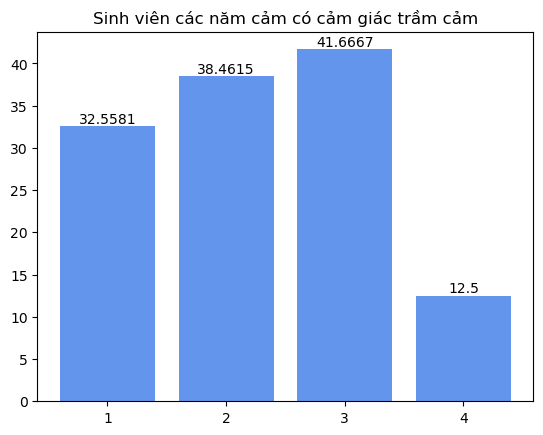

In [46]:
# YOUR CODE HERE
anxiety_levels_by_years= pd.DataFrame(data.groupby(['Your current year of Study']
                                              )['Do you have Depression?'].value_counts(normalize = True)*100)
have_anxiety=anxiety_levels_by_years.reset_index(level=0).loc[1]
have_anxiety.reset_index(drop=True, inplace=True)
have_anxiety = have_anxiety.sort_values(by='Your current year of Study',ascending = True)
fig, ax = plt.subplots()
bars= ax.bar(have_anxiety['Your current year of Study'], have_anxiety['Do you have Depression?'],color='#6495ED')
ax.bar_label(bars)
ax.set_title('Tỉ lệ sinh viên các năm cảm có cảm giác trầm cảm')

plt.show()

**Nhận xét**: ta có thể thấy tỉ lệ trầm cảm của sinh viên năm 3 là cao nhất, khi 41.67% sinh viên năm 3 khảo sát nói rằng họ cảm thấy bị trầm cảm, so với 38,46% của sinh viên năm 2. 

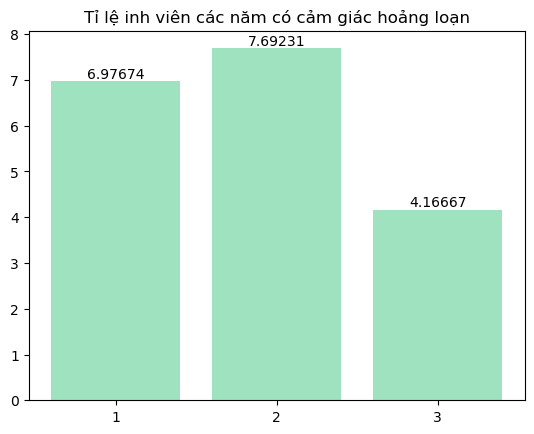

In [47]:
panic_levels_by_courses= pd.DataFrame(data.groupby(['Your current year of Study']
                                              )['Did you seek any specialist for a treatment?'].value_counts(normalize = True)*100)
have_panic=panic_levels_by_courses.reset_index(level=0).loc[1]
have_panic.reset_index(drop=True, inplace=True)
have_panic = have_panic.sort_values(by='Your current year of Study',ascending = True)
fig, ax = plt.subplots()
bars= ax.bar(have_panic['Your current year of Study'], have_panic['Did you seek any specialist for a treatment?'],color='#9FE2BF')
ax.bar_label(bars)
ax.set_title('Tỉ lệ inh viên các năm có cảm giác hoảng loạn')

plt.show()

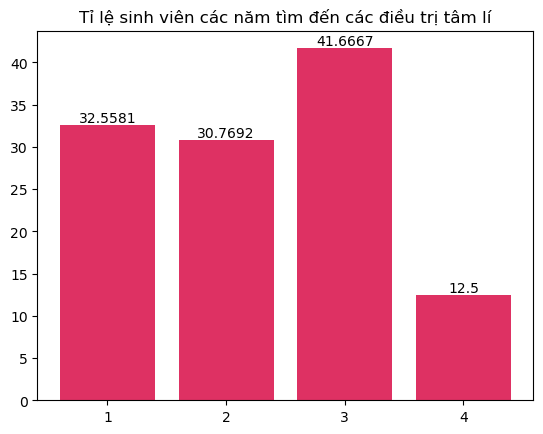

In [48]:
treatment_levels_by_years= pd.DataFrame(data.groupby(['Your current year of Study']
                                              )['Do you have Panic attack?'].value_counts(normalize = True)*100)
have_treatment=treatment_levels_by_years.reset_index(level=0).loc[1]
have_treatment.reset_index(drop=True, inplace=True)
have_treatment = have_treatment.sort_values(by='Your current year of Study',ascending = True)
fig, ax = plt.subplots()
bars= ax.bar(have_treatment['Your current year of Study'], have_treatment['Do you have Panic attack?'],color='#DE3163')
ax.bar_label(bars)
ax.set_title('Tỉ lệ sinh viên các năm tìm đến các điều trị tâm lí')

plt.show()

**Nhận xét cuối**: Từ khảo sát trên ta thấy, tỉ lệ lo lắng ở sinh viên năm 2 và năm 3 có vẻ đáng báo động hơn năm 1. Cụ thể hơn, sức khỏe tinh thần của sinh viên năm 3 là kém nhất khi có tỉ lệ trầm cảm và hoảng loạn lớn nhất trong các nhóm khảo sát, trong khi tỉ lệ sinh viên tìm đến các điều trị tâm lí ở năm 3 thấp hơn hẳn so với sinh viên năm 1 và sinh viên năm 2. Mức độ lo lắng của sinh viên năm 2 là cao hơn hẳn so với các nhóm còn lại, một điều cần phải quan tâm bởi vì lo lắng là dấu hiệu đầu tiên có thể dẫn đến các vấn đề tinh thần nghiêm trọng khác.

**Kết luận**: Để giảm tình trạng căng thẳng cho sinh viên, nhà trường có thể đưa ra mời các chuyên gia tâm lí, hoặc cải cách chương trình học nhằm tạo ra môi trường học tập lành mạnh, hấp dẫn hơn cho người học. Cần quan tâm đến các sinh viên năm 3 hơn, vì đây là nhóm đối tượng chịu căng thẳng nhiều nhất trong 4 năm học tập tại trường.